In [6]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt


def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)


def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)


def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)


P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


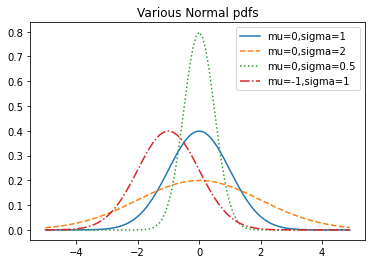

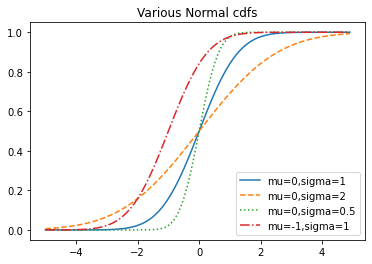

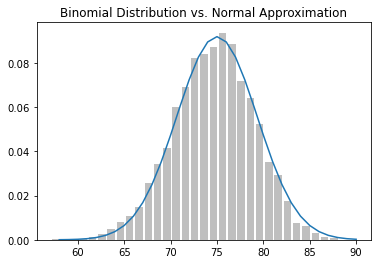

In [7]:
import random
from probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]


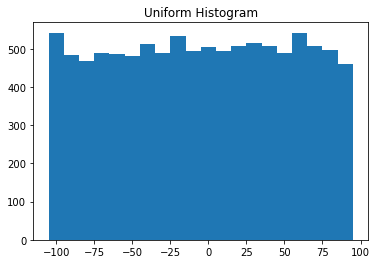

In [8]:
plot_histogram(uniform, 10, "Uniform Histogram")

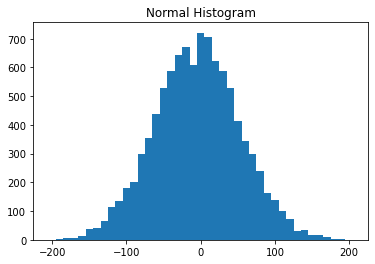

In [9]:
plot_histogram(normal, 10, "Normal Histogram")

In [10]:
def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())


xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]


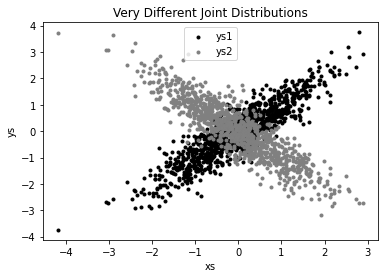

In [11]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

[5, 7, 9]
[1, 2, 3]
[16, 20]
[2, 4, 6]
[3.0, 4.0]
32
14
5.0
2.8284271247461903
2.8284271247461903
(2, 3)
Display the first row of A
[1, 2, 3]
Display the second row of A
[4, 5, 6]
Display the first column of A
[1, 4]
Display the second column of A
[2, 5]
Display the third column of A
[3, 6]
[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]


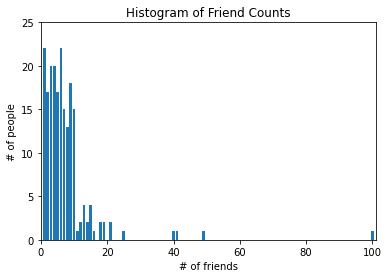

204
100.0
1
1
1
49
7.333333333333333
5
5.5
6.0
1
3
9
13
{1, 6}
99.0
81.54351395730716
Looks good!
9.03014473623248
Looks good!
6
22.425435139573064
Looks good!
0.37375725232621776
Looks good!
0.24736957366478218
Looks good!
0.24736957366478196
Looks good!
0.5736792115665573
Looks good!
0.5736792115665579
Looks good!
0.9010493686379609
-0.8920981526880033


In [12]:
from statistics import correlation

print(correlation(xs, ys1)) # about 0.9
print(correlation(xs, ys2)) # about -0.9

In [13]:
from linear_algebra import Matrix, Vector, make_matrix


def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)


In [14]:
from typing import List

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

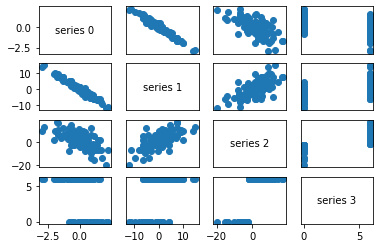

In [15]:
# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)
for i in range(num_vectors):
    for j in range(num_vectors):
        # Scatter column_j on the x-axis vs. column_i on the y-axis
        if i != j:
            ax[i][j].scatter(corr_data[j], corr_data[i])
        # unless i == j, in which case show the series name
        else:
            ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                              xycoords='axes fraction',
                              ha="center", va="center")

        # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)

# Fix the bottom-right and top-left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()


In [16]:
from typing import NamedTuple
import datetime


class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']


price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)
print("Success!" if price.symbol == 'MSFT' else "Failure!")
print("Success!" if price.closing_price == 106.03 else "Failure!")
print("Success!" if price.is_high_tech() else "Failure!")


Success!
Success!
Success!


In [17]:
from dataclasses import dataclass
import datetime

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']


price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

print("Success!" if price2.symbol == 'MSFT' else "Failure!")
print("Success!" if price2.closing_price == 106.03 else "Failure!")
print("Success!" if price2.is_high_tech() else "Failure!")


Success!
Success!
Success!


In [18]:
from dateutil.parser import parse


def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))


# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

print("Success!" if stock.symbol == "MSFT" else "Failure!")
print("Success!" if stock.date == datetime.date(2018, 12, 14) else "Failure!")
print("Success!" if stock.closing_price == 106.03 else "Failure!")


Success!
Success!
Success!


In [19]:
from typing import Optional
import re


def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row
    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None
    try:
        date = parse(date_).date()
    except ValueError:
        return None
    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)


# Should return None for errors
print("Success!" if try_parse_row(
    ["MSFT0", "2018-12-14", "106.03"]) is None else "Failure!")
print("Success!" if try_parse_row(
    ["MSFT", "2018-12--14", "106.03"]) is None else "Failure!")
print("Success!" if try_parse_row(
    ["MSFT", "2018-12-14", "x"]) is None else "Failure!")


Success!
Success!
Success!


In [25]:
from dateutil.parser import parse
import csv

with open("stocks.csv", "r") as f:
    reader = csv.DictReader(f)
    rows = [[row['Symbol'], row['Date'], row['Close']]
            for row in reader]

In [26]:
# skip header
maybe_data = [try_parse_row(row) for row in rows]

In [27]:
# Make sure they all loaded successfully:
assert maybe_data
assert all(sp is not None for sp in maybe_data)

In [28]:
# This is just to make mypy happy
data = [sp for sp in maybe_data if sp is not None]

In [29]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price


In [30]:
from typing import List
from collections import defaultdict
# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)

In [31]:
# Order the prices by date
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

In [32]:
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1


class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

In [33]:
all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]

In [58]:
max_change = max(all_changes, key=lambda change: change.pct_change)
# see, e.g. http://news.cnet.com/2100-1001-202143.html
print("Success!" if max_change.symbol == 'AAPL' else "Failure!")
print("Success!" if max_change.date == datetime.date(1997, 8, 6) else "Failure!")
print("Success!" if 0.33 < max_change.pct_change < 0.34 else "Failure!")

min_change = min(all_changes, key=lambda change: change.pct_change)
# see, e.g. http://money.cnn.com/2000/09/29/markets/techwrap/
print("Success!" if min_change.symbol == 'AAPL' else "Failure!")
print("Success!" if min_change.date == datetime.date(2000, 9, 29) else "Failure!")
print("Success!" if -0.52 < min_change.pct_change < -0.51 else "Failure!")


Success!
Success!
Success!
Success!
Success!
Success!


In [59]:
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}
for change in all_changes:
    changes_by_month[change.date.month].append(change)
avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}
# October is the best month
print("Success!" if avg_daily_change[10] == max(avg_daily_change.values()) else "Failure!")


Success!


In [64]:
from linear_algebra import distance
a_to_b = distance([63, 150], [67, 160]) # 10.77
a_to_c = distance([63, 150], [70, 171]) # 22.14
b_to_c = distance([67, 160], [70, 171]) # 11.40

In [38]:
a_to_b = distance([160, 150], [170.2, 160]) # 14.28
a_to_c = distance([160, 150], [177.8, 171]) # 27.53
b_to_c = distance([170.2, 160], [177.8, 171]) # 13.37

In [39]:
from typing import Tuple
from linear_algebra import vector_mean
from statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the mean and standard deviation for each position"""
    dim = len(data[0])
    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]
    return means, stdevs


vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
if means == [-1, 0, 1]:
    print("Success!")
else:
    print("Failure!")

if stdevs == [2, 1, 0]:
    print("Success!")
else:
    print("Failure!")   


Success!
Success!


In [60]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)
    # Make a copy of each vector
    rescaled = [v[:] for v in data] 
    for v in rescaled: 
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]
    return rescaled

In [66]:
means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

In [62]:
import tqdm
for i in tqdm.tqdm(range(100)):
    # do something slow
    _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:11<00:00,  8.45it/s]


In [43]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]
    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
                t.set_description(f"{len(primes)} primes")
    return primes
my_primes = primes_up_to(100_000)

9592 primes: 100%|██████████| 99997/99997 [00:10<00:00, 9817.12it/s] 


In [ ]:
import tqdm


pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

In [44]:
from linear_algebra import subtract

def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

In [45]:
from linear_algebra import magnitude

def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [46]:
from linear_algebra import dot

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

In [47]:
def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data)
            for i in range(len(w))]

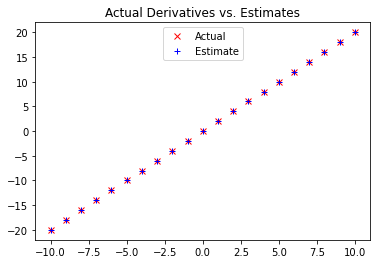

0 [-8.801794742704685, -6.396326795892401, 7.8001623249380225]
1 [-8.62575884785059, -6.268400259974553, 7.644159078439262]
2 [-8.45324367089358, -6.143032254775061, 7.491275896870477]
3 [-8.284178797475708, -6.02017160967956, 7.341450378933068]
4 [-8.118495221526194, -5.899768177485968, 7.1946213713544065]
5 [-7.95612531709567, -5.781772813936248, 7.050728943927318]
6 [-7.797002810753757, -5.666137357657523, 6.909714365048772]
7 [-7.641062754538681, -5.552814610504373, 6.771520077747796]
8 [-7.488241499447907, -5.441758318294285, 6.6360896761928405]
9 [-7.33847666945895, -5.3329231519284, 6.503367882668984]
10 [-7.191707136069771, -5.226264688889832, 6.373300525015605]
11 [-7.047872993348375, -5.121739395112035, 6.245834514515293]
12 [-6.906915533481407, -5.019304607209794, 6.120917824224987]
13 [-6.768777222811779, -4.918918515065599, 5.998499467740488]
14 [-6.633401678355543, -4.820540144764287, 5.878529478385678]
15 [-6.500733644788433, -4.724129341869001, 5.760958888817965]
16 [-6

In [48]:
from gradient_descent import gradient_step

def first_principal_component(data: List[Vector], n: int = 100, step_size: float = 0.1) -> Vector:
    # Start with a random guess
    guess = [1.0 for _ in data[0]]
    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv:.3f}")
    return direction(guess)

In [49]:
from linear_algebra import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

In [50]:
from linear_algebra import subtract

def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the result from v"""
    return subtract(v, project(v, w))


def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

In [51]:
def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)
    return components

In [52]:
def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v, w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

0.9010493686379609
-0.8920981526880033


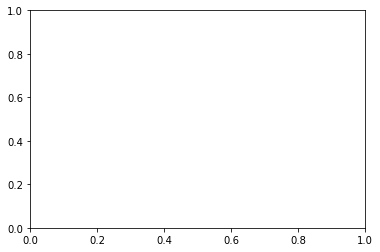

In [56]:
plt.gca().clear()
plt.close()

import random
from probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")



plt.savefig('working_histogram_uniform.png')
plt.gca().clear()
plt.close()

plot_histogram(normal, 10, "Normal Histogram")


plt.savefig('working_histogram_normal.png')
plt.gca().clear()

from statistics import correlation

print(correlation(xs, ys1))      # about 0.9
print(correlation(xs, ys2))      # about -0.9
